In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [253]:
df = pd.read_csv('/content/WDIData for india(1960-2021).csv')

In [254]:
print(df.head())

  Country Name Country Code  \
0        India          IND   
1        India          IND   
2        India          IND   
3        India          IND   
4        India          IND   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2012       2013       2014  \
0   NaN   NaN   NaN   NaN   NaN  ...  39.600000  41.600000  44.800000   
1   NaN   NaN   NaN   NaN   NaN  ...  17.900000  20.500000  23.600000   
2   NaN   NaN   NaN   NaN   NaN  ...  75.100000  77.400000  79.700000   
3   NaN   NaN   NaN   NaN   NaN  .

In [255]:
print(df.isnull().sum())

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
1960              1171
                  ... 
2017               464
2018               474
2019               573
2020               769
2021              1403
Length: 66, dtype: int64


In [256]:
pysqldf = lambda q: sqldf(q, globals())

In [257]:
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
               1960          1961          1962          1963          1964  \
count  2.740000e+02  3.160000e+02  3.270000e+02  3.290000e+02  3.320000e+02   
mean   2.350663e+11  2.099709e+11  2.097196e+11  2.210701e+11  2.349339e+11   
std    1.145160e+12  1.099231e+12  1.110823e+12  1.167866e+12  1.244720e+12   
min   -1.283236e+10 -1.171495e+10 -1.379336e+10 -1.035886e+10 -1.196286e+10   
25%    6.746989e+00  5.211637e+00  5.951757e+00  6.321639e+00  6.440952e+00   
50%    2.459500e+02  8.122753e+01  7.354257e+01  5.558134e+01  6.024458e+01   
75%    4.686725e+09  1.383300e+09  1.000800e+09  9.774400e+08  1.216010e+09   
max    7.546040e+12  7.674470e+12  7.992870e+12  8.435340e+12  8.992090e+12   

               1965          1966          1967          1968          1969  \
count  3.360000e+02  3.320000e+02  3.390000e+02  3.370000e+02  3.410000e+02   
mean   2.300406e+11  2.361294e+11  2.465501e+11  2.549688e+11  2.671100e+11   
std    1.219879e+12  1.236199e+

In [258]:
num_unique_indicators = len(df['Indicator Name'].unique())
print("\nNumber of Unique Indicators:", num_unique_indicators)



Number of Unique Indicators: 1445


In [259]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


In [260]:
year_columns = [col for col in df.columns if col.isdigit() and int(col) in range(1960, 2021)]
num_unique_years = len(year_columns)
print("\nNumber of Unique Years:", num_unique_years)


Number of Unique Years: 61


In [261]:
numerical_df = df.select_dtypes(include=['number'])

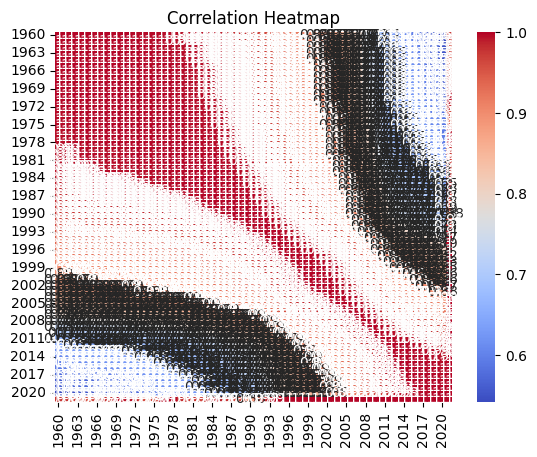

In [262]:
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

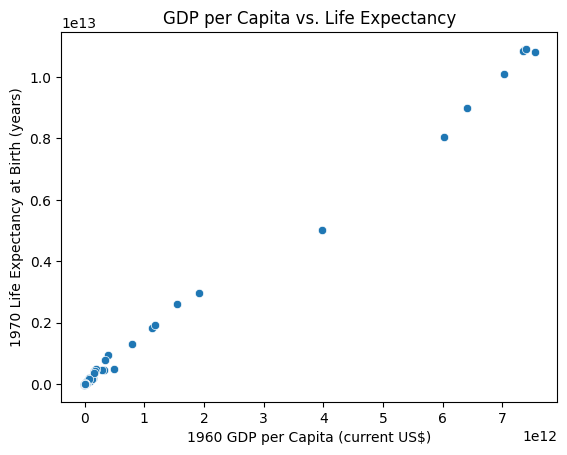

In [263]:
sns.scatterplot(data=df, x='1960', y='1970')
plt.title('GDP per Capita vs. Life Expectancy')
plt.xlabel('1960 GDP per Capita (current US$)')
plt.ylabel('1970 Life Expectancy at Birth (years)')
plt.show()


In [264]:
imputer = SimpleImputer(strategy='mean')
df_clean = df.dropna(subset=['2019', '2021'])
target_imputer = SimpleImputer(strategy='mean')
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test_imputed = target_imputer.transform(y_test.values.reshape(-1, 1))
lm.fit(X_train_imputed, y_train_imputed)
predictions = lm.predict(X_test_imputed)
mse = mean_squared_error(y_test_imputed, predictions)
print("\nMean Squared Error:", mse)


Mean Squared Error: 1.1543695634896881e+21


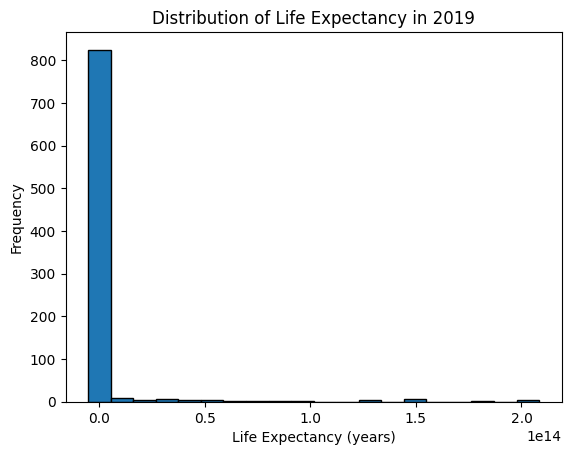

In [265]:
year_of_interest = '2019'  # Select the year you are interested in

plt.hist(df[year_of_interest], bins=20, edgecolor='black')
plt.title('Distribution of Life Expectancy in ' + year_of_interest)
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()

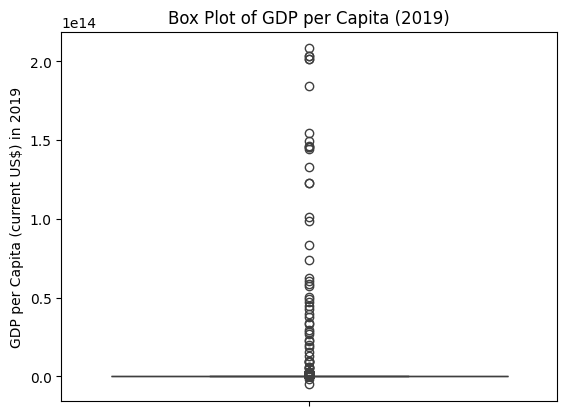

In [266]:
sns.boxplot(data=df, y='2019')
plt.title('Box Plot of GDP per Capita (2019)')
plt.ylabel('GDP per Capita (current US$) in 2019')
plt.show()

In [267]:
top_10_indicators = pysqldf("""
                            SELECT
                                `Indicator Name`,
                                AVG(`2019`) AS avg_value  -- Changed 'Value' to '2019'
                            FROM
                                df
                            GROUP BY
                                `Indicator Name`
                            ORDER BY
                                avg_value DESC
                            LIMIT 10
                            """)
print(top_10_indicators)

                                      Indicator Name     avg_value
0           Gross national expenditure (current LCU)  2.083450e+14
1                   GDP: linked series (current LCU)  2.035100e+14
2                                  GDP (current LCU)  2.035100e+14
3                   GNI: linked series (current LCU)  2.015790e+14
4                                  GNI (current LCU)  2.015790e+14
5  Gross value added at basic prices (GVA) (curre...  1.846130e+14
6                          Broad money (current LCU)  1.547610e+14
7          Gross national expenditure (constant LCU)  1.491680e+14
8               Gross domestic income (constant LCU)  1.465970e+14
9        Final consumption expenditure (current LCU)  1.459400e+14


<ipython-input-268-ad365cc338ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_indicators, x='avg_value', y='Indicator Name', palette='viridis')


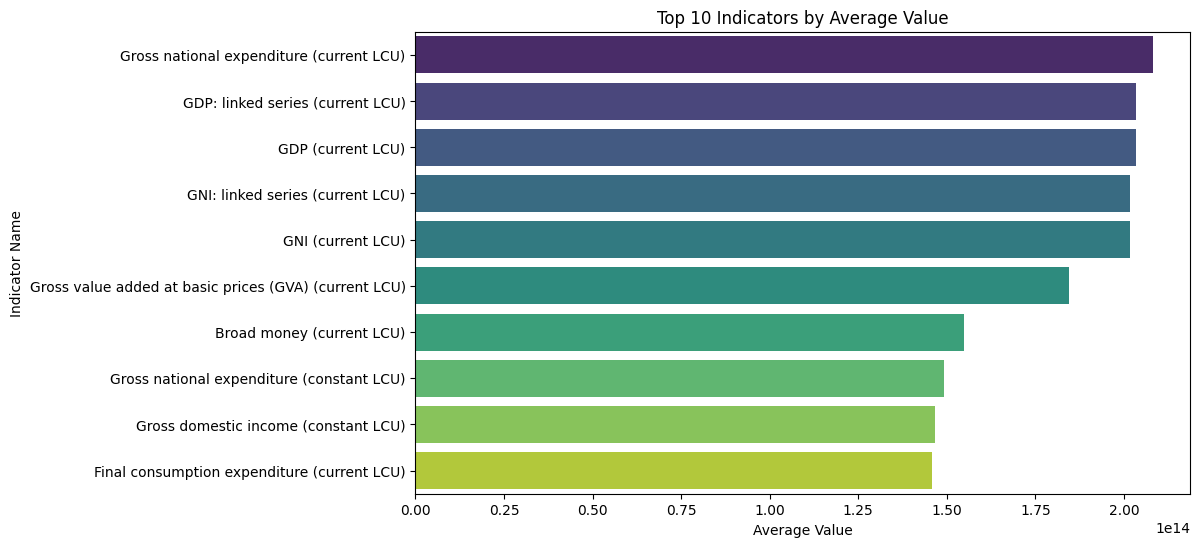

In [268]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_indicators, x='avg_value', y='Indicator Name', palette='viridis')
plt.title('Top 10 Indicators by Average Value')
plt.xlabel('Average Value')
plt.ylabel('Indicator Name')
plt.show()

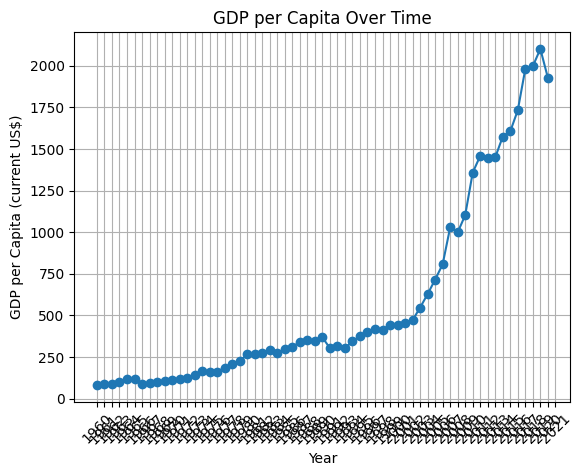

In [269]:
gdp_over_time = df[df['Indicator Name'] == 'GDP per capita (current US$)']
years = df.columns[4:]  # Extract years from columns
plt.plot(years, gdp_over_time.iloc[0, 4:], marker='o', linestyle='-')  # Assuming there's only one row for GDP per capita
plt.title('GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current US$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [271]:
employment_dist = pysqldf("""
                        SELECT
                            `Indicator Name`,
                            AVG(`2019`) AS avg_value  -- Changed 'Value' to the year column you want to average
                        FROM
                            df
                        WHERE
                            `Indicator Name` LIKE '%employment%'
                        GROUP BY
                            `Indicator Name`
                        """)
print(employment_dist)

                                       Indicator Name  avg_value
0   Adequacy of unemployment benefits and ALMP (% ...        NaN
1   Benefit incidence of unemployment benefits and...        NaN
2   Child employment in agriculture (% of economic...        NaN
3   Child employment in agriculture, female (% of ...        NaN
4   Child employment in agriculture, male (% of ma...        NaN
..                                                ...        ...
94  Vulnerable employment, male (% of male employm...  73.410002
95  Vulnerable employment, total (% of total emplo...  73.790001
96  Wage and salaried workers, female (% of female...  24.160000
97  Wage and salaried workers, male (% of male emp...  24.170000
98  Wage and salaried workers, total (% of total e...  24.170000

[99 rows x 2 columns]


In [272]:
employment_dist = employment_dist.dropna(subset=['avg_value'])

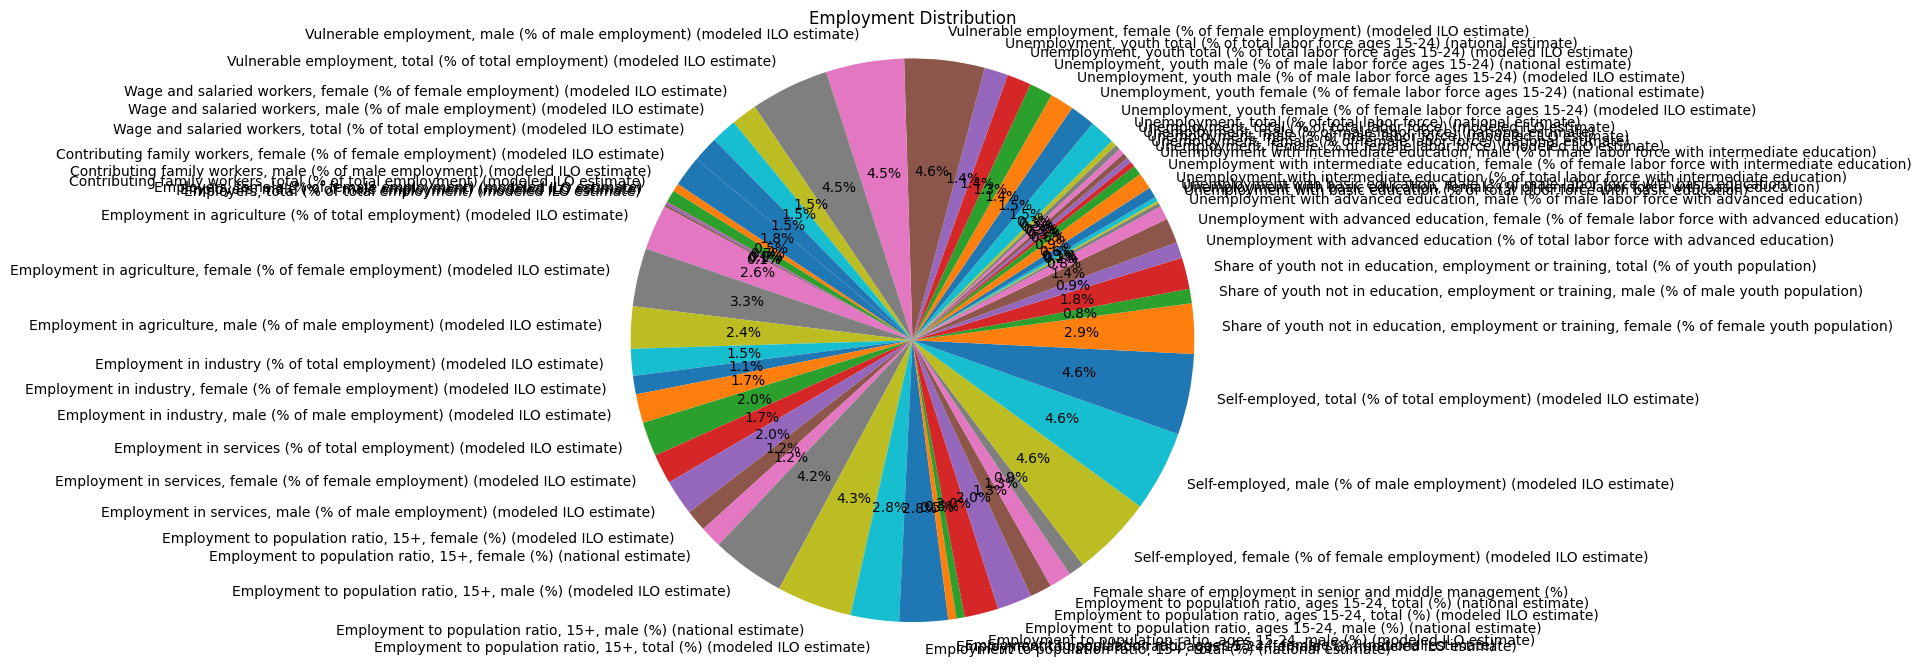

In [273]:
plt.figure(figsize=(8, 8))
plt.pie(employment_dist['avg_value'], labels=employment_dist['Indicator Name'], autopct='%1.1f%%', startangle=140)
plt.title('Employment Distribution')
plt.axis('equal')
plt.show()

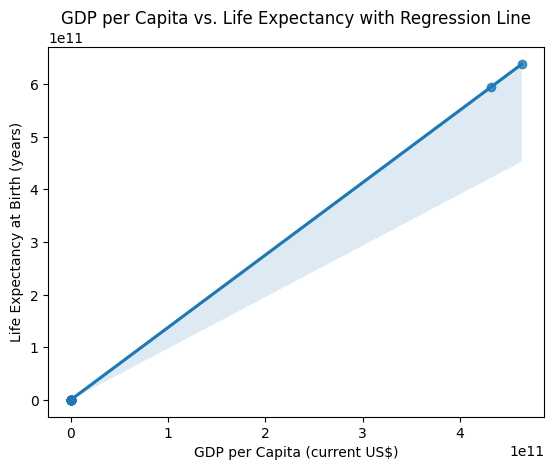

In [274]:
sns.regplot(data=df, x='2019', y='2021')
plt.title('GDP per Capita vs. Life Expectancy with Regression Line')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.show()

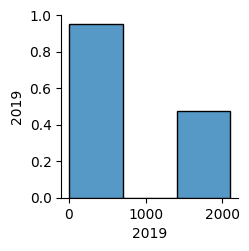

In [275]:
columns_2019 = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2019']

gdp_2019 = df[df['Indicator Name'] == 'GDP per capita (current US$)'][columns_2019]
life_expectancy_2019 = df[df['Indicator Name'] == 'Life expectancy at birth, total (years)'][columns_2019]
unemployment_2019 = df[df['Indicator Name'] == 'Unemployment, total (% of total labor force) (modeled ILO estimate)'][columns_2019]

data_2019 = pd.concat([gdp_2019, life_expectancy_2019, unemployment_2019])

sns.pairplot(data_2019)
plt.show()

In [276]:
top_5_years = pysqldf("""
                    SELECT
                        '2019' AS Year,
                        AVG(`2019`) AS avg_value
                    FROM
                        df
                    UNION ALL
                    SELECT
                        '2020' AS Year,
                        AVG(`2020`) AS avg_value
                    FROM
                        df
                    UNION ALL
                    SELECT
                        '2021' AS Year,
                        AVG(`2021`) AS avg_value
                    FROM
                        df
                    ORDER BY
                        avg_value DESC
                    LIMIT 5
                    """)
print(top_5_years)

   Year     avg_value
0  2020  5.246179e+12
1  2019  4.314866e+12
2  2021  2.937076e+10


<ipython-input-277-380ee5705b2d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_years, x='avg_value', y='Year', palette='magma')


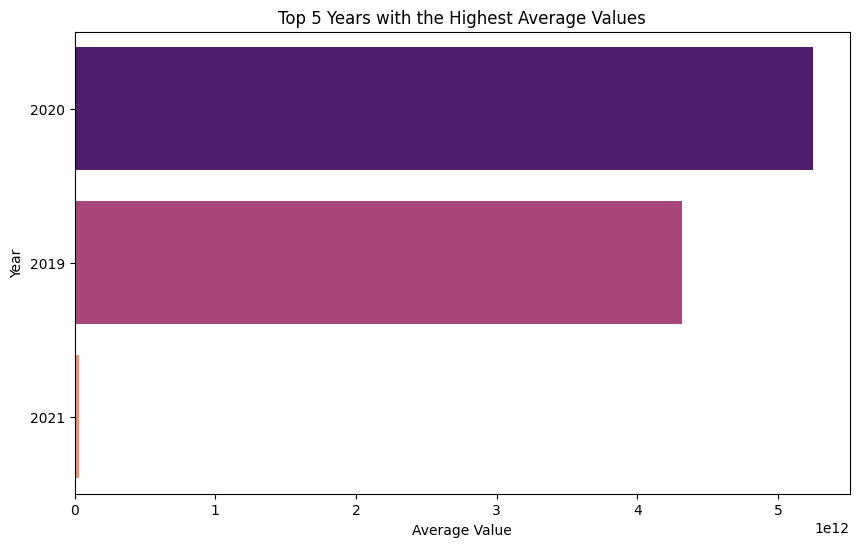

In [277]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_years, x='avg_value', y='Year', palette='magma')
plt.title('Top 5 Years with the Highest Average Values')
plt.xlabel('Average Value')
plt.ylabel('Year')
plt.show()

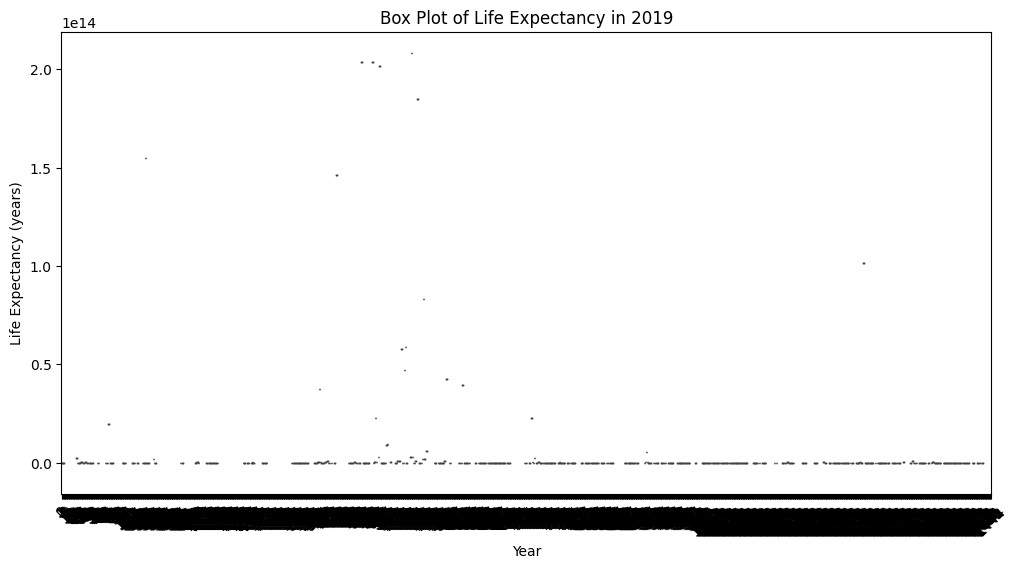

In [278]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=df.index, y='2019')
plt.title('Box Plot of Life Expectancy in 2019')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-279-fd34c74203af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y='2019', palette='magma')


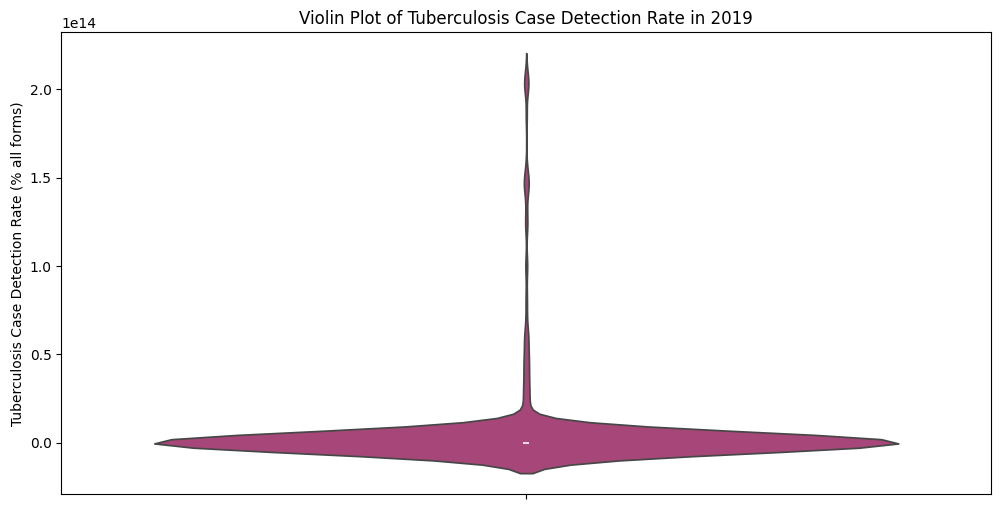

In [279]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, y='2019', palette='magma')
plt.title('Violin Plot of Tuberculosis Case Detection Rate in 2019')
plt.ylabel('Tuberculosis Case Detection Rate (% all forms)')
plt.show()

In [280]:
numeric_df = df.apply(pd.to_numeric, errors='coerce')


In [281]:
numeric_df = numeric_df.dropna(axis=1, how='all')

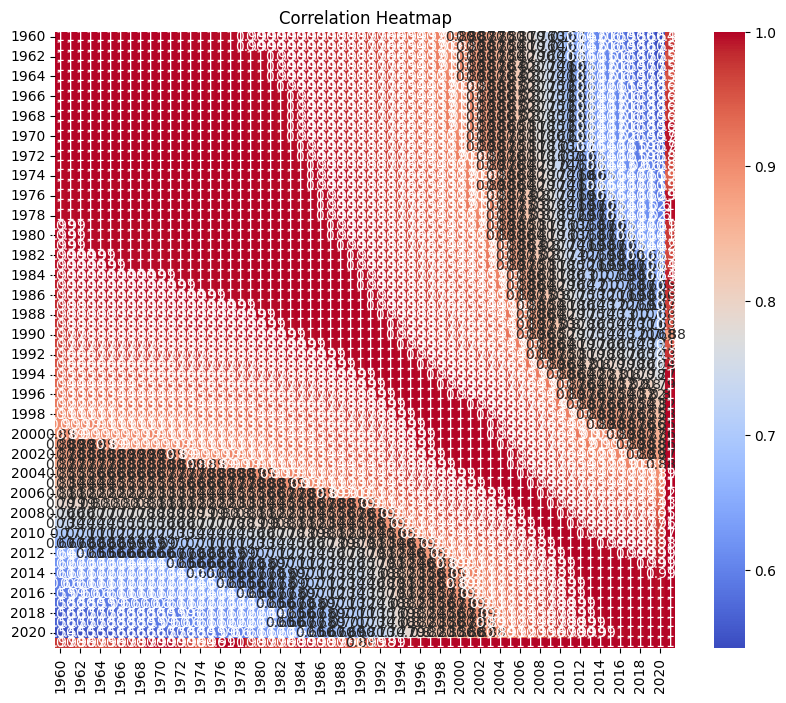

In [282]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [283]:
top_5_indicators = pysqldf("""
                            SELECT
                                `Indicator Name`,
                                AVG(`2019`) AS avg_value  -- Changed 'Value' to '2019'
                            FROM
                                df
                            GROUP BY
                                `Indicator Name`
                            ORDER BY
                                avg_value DESC
                            LIMIT 5
                            """)
print(top_5_indicators)

                             Indicator Name     avg_value
0  Gross national expenditure (current LCU)  2.083450e+14
1          GDP: linked series (current LCU)  2.035100e+14
2                         GDP (current LCU)  2.035100e+14
3          GNI: linked series (current LCU)  2.015790e+14
4                         GNI (current LCU)  2.015790e+14


<ipython-input-284-a3234e5a4431>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_indicators, x='avg_value', y='Indicator Name', palette='rocket')


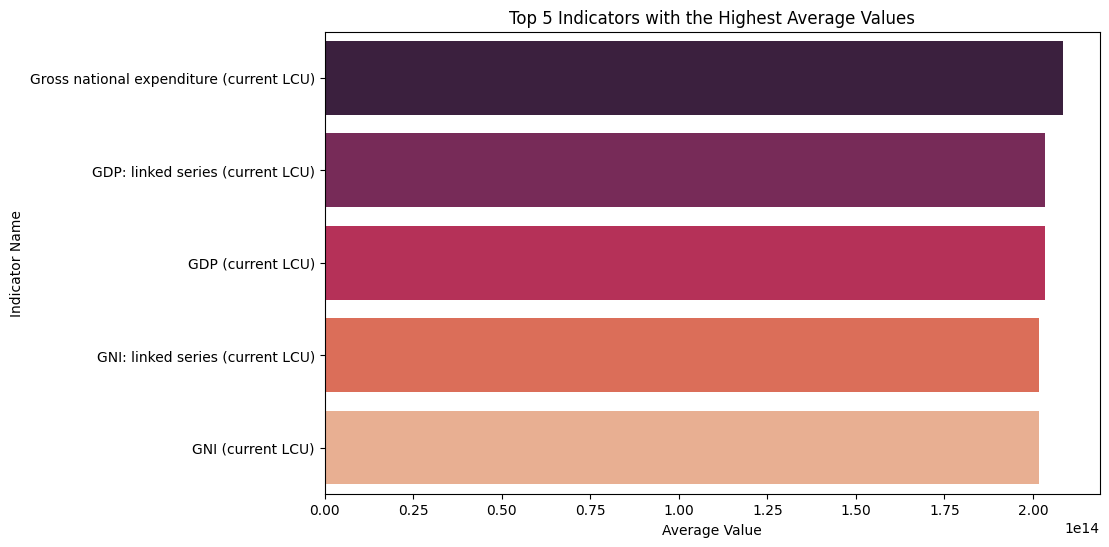

In [284]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_indicators, x='avg_value', y='Indicator Name', palette='rocket')
plt.title('Top 5 Indicators with the Highest Average Values')
plt.xlabel('Average Value')
plt.ylabel('Indicator Name')
plt.show()

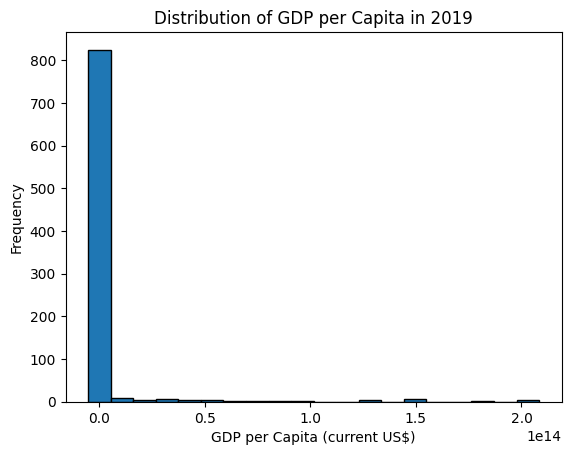

In [285]:
plt.hist(df['2019'], bins=20, edgecolor='black')
plt.title('Distribution of GDP per Capita in 2019')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Frequency')
plt.show()

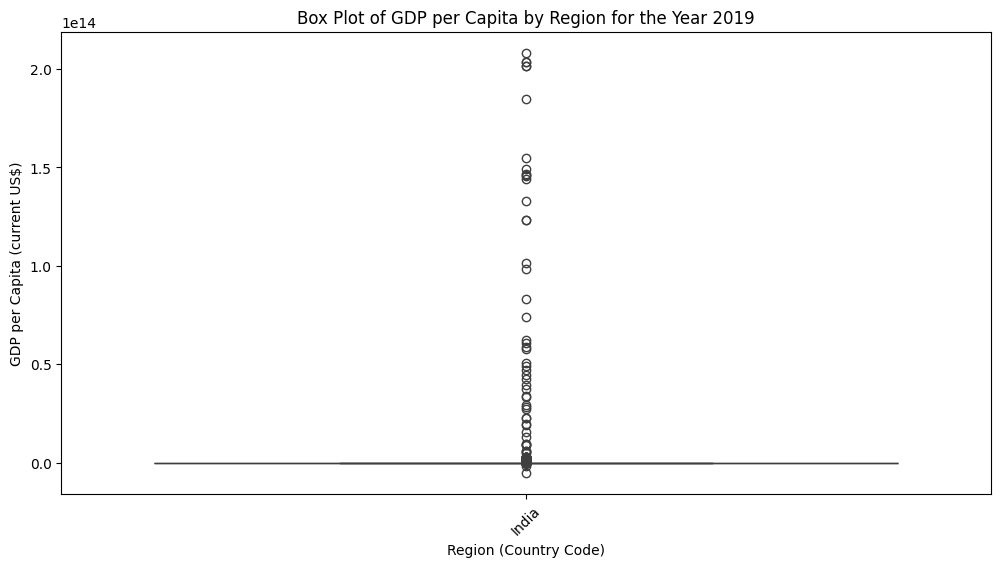

In [286]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country Name', y='2019')
plt.title('Box Plot of GDP per Capita by Region for the Year 2019')
plt.xlabel('Region (Country Code)')
plt.ylabel('GDP per Capita (current US$)')
plt.xticks(rotation=45)
plt.show()